# Рубежный контроль №2

## Группа: ИУ5Ц-82Б
## Номер варианта 29
## Студент: Федюнев Александр Юрьевич

### Задание:

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

### Импорт библиотек

### Набор данных:

- Контекст

Формула Е - это чемпионат по одноместному автоспорту, в котором используются только электромобили.

- Содержание

Набор данных состоит из результатов гонок Формулы E за период с 1 сезона 2014/15 (Пекин Эприкс) по 7 сезон 2020/21 (Монако Эприкс).

Данный датасет содержит такие колонки:

- SeasonName
- RaceName
- Pos
- DriverNumber
- DriverFirstName
- DriverLastName
- Team
- Started
- Best
- Time

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
from IPython.display import Image
from io import StringIO
import graphviz 
import pydotplus
from sklearn.model_selection import train_test_split
%matplotlib inline 
%matplotlib inline 
sns.set(style="ticks")
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

## Загрузка данных

In [2]:
data = pd.read_csv('Formual_E_Raceresults.csv', sep=",")

## Основные характеристики датасета

In [3]:
data.head()

SeasonName        RaceName  Pos DriverNumber DriverFirstName  \
0  Season 1 2014/15  Beijing E-Prix    1          #11           Lucas   
1  Season 1 2014/15  Beijing E-Prix    2          #27          Franck   
2  Season 1 2014/15  Beijing E-Prix    3           #2             Sam   
3  Season 1 2014/15  Beijing E-Prix    4          #28         Charles   
4  Season 1 2014/15  Beijing E-Prix    5           #5           Karun   

  DriverLastName                               Team Started      Best  \
0      Di Grassi      Audi Sport ABT Formula E Team       2  1:46.718   
1       Montagny  Andretti Autosport Formula E Team       8  1:46.640   
2           Bird       Virgin Racing Formula E Team      11  1:46.563   
3            Pic  Andretti Autosport Formula E Team       7  1:46.730   
4       Chandhok     Mahindra Racing Formula E Team       4  1:45.892   

        Time  PtsPoints  
0  52:23.413         25  
1    + 2.867         18  
2    + 6.559         15  
3   + 19.301         12  
4   + 23.952         10

In [4]:
# Выведем размер датасета - по итогу получилось:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))
total_count = data.shape[1]
print('Всего колонок: {}'.format(total_count))

Всего строк: 1502
Всего колонок: 11


In [5]:
# Выведем список колонок с их типами.
data.dtypes

SeasonName         object
RaceName           object
Pos                 int64
DriverNumber       object
DriverFirstName    object
DriverLastName     object
Team               object
Started            object
Best               object
Time               object
PtsPoints           int64
dtype: object

In [6]:
# Проверил количество пустых значений по колонкам.
for col_empty in data.columns:
    empty_count = data[data[col_empty].isnull()].shape[0]
    print('{} - {}'.format(col_empty, empty_count))

SeasonName - 0
RaceName - 0
Pos - 0
DriverNumber - 0
DriverFirstName - 0
DriverLastName - 0
Team - 0
Started - 0
Best - 0
Time - 0
PtsPoints - 0


Количество пустых значений означает, что все значения по этим колонкам заполнены.

### Кодирование категориальных признаков

Преобразуем slug, date и currency в числовые значения (label encoding)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
# Создаем новый фрейм данных, содержащий только столбцы типа object
obj_data = data.select_dtypes(include=['object']).copy()

In [9]:
obj_data.head()

SeasonName        RaceName DriverNumber DriverFirstName  \
0  Season 1 2014/15  Beijing E-Prix          #11           Lucas   
1  Season 1 2014/15  Beijing E-Prix          #27          Franck   
2  Season 1 2014/15  Beijing E-Prix           #2             Sam   
3  Season 1 2014/15  Beijing E-Prix          #28         Charles   
4  Season 1 2014/15  Beijing E-Prix           #5           Karun   

  DriverLastName                               Team Started      Best  \
0      Di Grassi      Audi Sport ABT Formula E Team       2  1:46.718   
1       Montagny  Andretti Autosport Formula E Team       8  1:46.640   
2           Bird       Virgin Racing Formula E Team      11  1:46.563   
3            Pic  Andretti Autosport Formula E Team       7  1:46.730   
4       Chandhok     Mahindra Racing Formula E Team       4  1:45.892   

        Time  
0  52:23.413  
1    + 2.867  
2    + 6.559  
3   + 19.301  
4   + 23.952

In [10]:
data["SeasonName"].value_counts()

Season 5 2018/19    286
Season 3 2016/17    240
Season 4 2017/18    240
Season 1 2014/15    220
Season 2 2015/16    180
Season 6 2019/20    168
Season 7 2020/21    168
Name: SeasonName, dtype: int64

In [11]:
data["RaceName"].value_counts()

Berlin E-Prix                120
Hong Kong E-Prix              82
Mexico City E-Prix            80
Paris E-Prix                  80
London E-Prix                 76
Marrakesh E-Prix              62
Monaco E-Prix                 62
Punta del Este E-Prix         58
Rome E-Prix                   42
Santiago E-Prix               42
New York E-Prix               40
Montr?al E-Prix               40
New York City E-Prix          40
Putrajaya E-Prix              38
Beijing E-Prix                38
Buenos Aires E-Prix           38
Long Beach E-Prix             38
Berlin E-Prix - R7            24
DHL Valencia E-Prix - R6      24
DHL Valencia E-Prix - R5      24
Rome E-Prix - R4              24
Rome E-Prix - R3              24
Diriyah E-Prix - R2           24
Diriyah E-Prix - R1           24
Berlin E-Prix - R11           24
Berlin E-Prix - R10           24
Berlin E-Prix - R9            24
Berlin E-Prix - R8            24
Berlin E-Prix - R6            24
Mexico City E-Prix - R4       24
Monaco E-P

In [12]:
data["DriverNumber"].value_counts()

#28    72
#7     72
#6     72
#27    72
#23    72
#8     65
#2     65
#66    65
#5     62
#4     61
#25    61
#11    60
#3     55
#20    51
#9     45
#19    44
#88    40
#36    39
#18    30
#94    27
#17    27
#48    27
#22    27
#33    26
#16    25
#1     22
#77    21
#55    21
#21    21
#64    20
#37    19
#99    18
#10    18
#13    14
#68    12
#47    12
#30    11
#12    10
#51     7
#29     7
#71     7
Name: DriverNumber, dtype: int64

In [13]:
data["DriverFirstName"].value_counts()
data["DriverLastName"].value_counts()

Di Grassi    72
Bird         72
Buemi        70
Vergne       70
Da Costa     68
             ..
Yamamoto      2
Hartley       1
Wilson        1
Andretti      1
Sato          1
Name: DriverLastName, Length: 72, dtype: int64

In [14]:
data["Team"].value_counts()

Mahindra Racing                      102
Venturi Formula E Team                92
Panasonic Jaguar Racing               88
Audi Sport ABT Schaeffler             78
Renault e.Dams                        68
BMW i Andretti Motorsport             54
Nissan e.Dams                         54
Envision Virgin Racing                54
NIO Formula E team                    50
Techeetah                             48
DS Virgin Racing                      48
ABT Schaeffler Audi Sport             44
Dragon Racing Formula E Team          42
Mahindra Racing Formula E Team        42
Geox Dragon                           40
TAG Heuer Porsche Formula E Team      28
DS TECHEETAH                          28
NIO 333 FE Team                       28
ROKiT Venturi Racing                  28
HWA Racelab                           26
DS TECHEETAH Formula E Team           26
Faraday Future Dragon Racing          24
NextEV NIO                            24
Venturi Formula E                     24
Dragon Racing   

In [15]:
data["Best"].value_counts()

–           29
1:09.690     2
1:09.902     2
1:40.860     2
1:11.580     2
            ..
53.869       1
53.909       1
54.490       1
55.959       1
1:34.586     1
Name: Best, Length: 1437, dtype: int64

In [16]:
data["Time"].value_counts()

–DNF          229
1 lap          74
–X             27
–DSQ           21
3 laps         16
             ... 
+ 59.010        1
+ 1:00.269      1
+ 1:02.463      1
+ 1:07.695      1
+ 12.067        1
Name: Time, Length: 1104, dtype: int64

In [17]:
data["SeasonName"] = data["SeasonName"].astype('category')
data["RaceName"] = data["RaceName"].astype('category')
data["DriverNumber"] = data["DriverNumber"].astype('category')
data["DriverFirstName"] = data["DriverFirstName"].astype('category')
data["DriverLastName"] = data["DriverLastName"].astype('category')
data["Team"] = data["Team"].astype('category')
data["Started"] = data["Started"].astype('category')
data["Best"] = data["Best"].astype('category')
data["Time"] = data["Time"].astype('category')

In [18]:
data.dtypes

SeasonName         category
RaceName           category
Pos                   int64
DriverNumber       category
DriverFirstName    category
DriverLastName     category
Team               category
Started            category
Best               category
Time               category
PtsPoints             int64
dtype: object

In [19]:
data["SeasonName_cat"] = data["SeasonName"].cat.codes
data["RaceName_cat"] = data["RaceName"].cat.codes
data["DriverNumber_cat"] = data["DriverNumber"].cat.codes
data["DriverFirstName_cat"] = data["DriverFirstName"].cat.codes
data["DriverLastName_cat"] = data["DriverLastName"].cat.codes
data["Team_cat"] = data["Team"].cat.codes
data["Started_cat"] = data["Started"].cat.codes
data["Best_cat"] = data["Best"].cat.codes
data["Time_cat"] = data["Time"].cat.codes

In [20]:
data.head()

SeasonName        RaceName  Pos DriverNumber DriverFirstName  \
0  Season 1 2014/15  Beijing E-Prix    1          #11           Lucas   
1  Season 1 2014/15  Beijing E-Prix    2          #27          Franck   
2  Season 1 2014/15  Beijing E-Prix    3           #2             Sam   
3  Season 1 2014/15  Beijing E-Prix    4          #28         Charles   
4  Season 1 2014/15  Beijing E-Prix    5           #5           Karun   

  DriverLastName                               Team Started      Best  \
0      Di Grassi      Audi Sport ABT Formula E Team       2  1:46.718   
1       Montagny  Andretti Autosport Formula E Team       8  1:46.640   
2           Bird       Virgin Racing Formula E Team      11  1:46.563   
3            Pic  Andretti Autosport Formula E Team       7  1:46.730   
4       Chandhok     Mahindra Racing Formula E Team       4  1:45.892   

        Time  PtsPoints  SeasonName_cat  RaceName_cat  DriverNumber_cat  \
0  52:23.413         25               0             1                 2   
1    + 2.867         18               0             1                15   
2    + 6.559         15               0             1                 9   
3   + 19.301         12               0             1                16   
4   + 23.952         10               0             1                26   

   DriverFirstName_cat  DriverLastName_cat  Team_cat  Started_cat  Best_cat  \
0                   32                  18         5           13      1322   
1                   15                  43         2           24      1321   
2                   57                   4        41            3      1320   
3                    8                  49         2           23      1323   
4                   28                  12        23           20      1315   

   Time_cat  
0      1082  
1       390  
2       919  
3       281  
4       485

In [21]:
data = data.drop(columns='SeasonName')
data = data.drop(columns='RaceName')
data = data.drop(columns='DriverNumber')
data = data.drop(columns='DriverFirstName')
data = data.drop(columns='DriverLastName')
data = data.drop(columns='Team')
data = data.drop(columns='Started')
data = data.drop(columns='Best')
data = data.drop(columns='Time')

In [22]:
data.head()

Pos  PtsPoints  SeasonName_cat  RaceName_cat  DriverNumber_cat  \
0    1         25               0             1                 2   
1    2         18               0             1                15   
2    3         15               0             1                 9   
3    4         12               0             1                16   
4    5         10               0             1                26   

   DriverFirstName_cat  DriverLastName_cat  Team_cat  Started_cat  Best_cat  \
0                   32                  18         5           13      1322   
1                   15                  43         2           24      1321   
2                   57                   4        41            3      1320   
3                    8                  49         2           23      1323   
4                   28                  12        23           20      1315   

   Time_cat  
0      1082  
1       390  
2       919  
3       281  
4       485

In [23]:
data.dtypes

Pos                    int64
PtsPoints              int64
SeasonName_cat          int8
RaceName_cat            int8
DriverNumber_cat        int8
DriverFirstName_cat     int8
DriverLastName_cat      int8
Team_cat                int8
Started_cat             int8
Best_cat               int16
Time_cat               int16
dtype: object

### Масштабирование данных

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data)
sc1_data

array([[0.04347826, 0.83333333, 0.        , ..., 0.52      , 0.92061281,
        0.98096102],
       [0.08695652, 0.6       , 0.        , ..., 0.96      , 0.91991643,
        0.35358114],
       [0.13043478, 0.5       , 0.        , ..., 0.12      , 0.91922006,
        0.83318223],
       ...,
       [0.        , 0.        , 1.        , ..., 0.28      , 0.82590529,
        0.99818676],
       [0.        , 0.        , 1.        , ..., 0.04      , 0.82660167,
        0.99818676],
       [0.        , 0.        , 1.        , ..., 0.12      , 1.        ,
        0.99818676]])

Построим кореляционную матрицу

<AxesSubplot:>

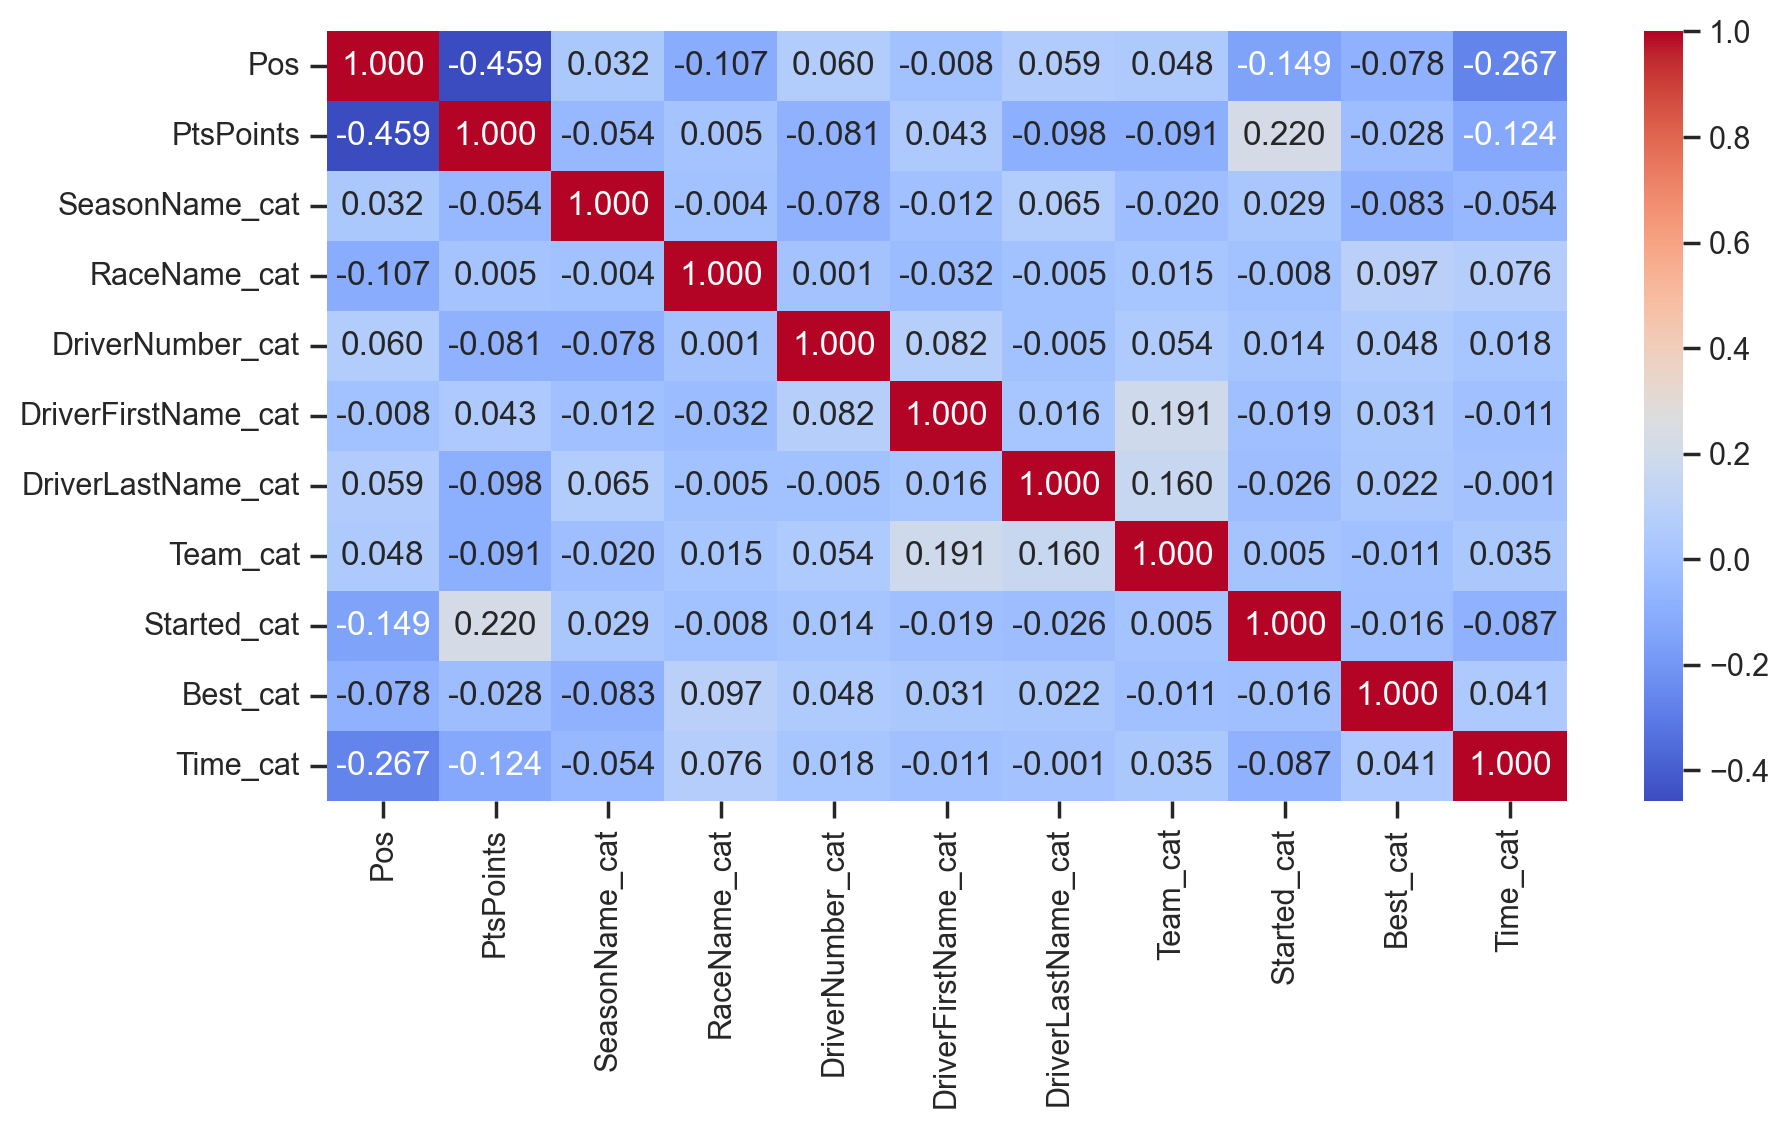

In [26]:
ig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.3f', cmap="coolwarm")

### Предсказание целевого признака

Предскажем значение целевого признака open.

##### Разделение выборки на обучающую и тестовую

In [27]:
X = data.drop(columns='PtsPoints')
Y = data['PtsPoints']

Входные данные:

In [28]:
X.head()

Pos  SeasonName_cat  RaceName_cat  DriverNumber_cat  DriverFirstName_cat  \
0    1               0             1                 2                   32   
1    2               0             1                15                   15   
2    3               0             1                 9                   57   
3    4               0             1                16                    8   
4    5               0             1                26                   28   

   DriverLastName_cat  Team_cat  Started_cat  Best_cat  Time_cat  
0                  18         5           13      1322      1082  
1                  43         2           24      1321       390  
2                   4        41            3      1320       919  
3                  49         2           23      1323       281  
4                  12        23           20      1315       485

Выходные данные:

In [29]:
Y.head()

0    25
1    18
2    15
3    12
4    10
Name: PtsPoints, dtype: int64

In [30]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 2023, test_size = 0.1)

Входные параметры обучающей выборки

In [31]:
X_train.head()

Pos  SeasonName_cat  RaceName_cat  DriverNumber_cat  \
1470   17               6            12                37   
483     4               2            22                18   
577     0               2            26                22   
231    12               1             1                14   
1434    5               6            11                20   

      DriverFirstName_cat  DriverLastName_cat  Team_cat  Started_cat  \
1470                   65                   5        27           19   
483                    42                  50        29           19   
577                     1                  39        12           12   
231                    23                  66        13           21   
1434                   53                  52         6            6   

      Best_cat  Time_cat  
1470      1164       267  
483       1367       275  
577        259      1101  
231       1288       356  
1434      1270       865

Выходные параметры обучающей выборки

In [32]:
Y_train.head()

1470     0
483     12
577      3
231      0
1434    10
Name: PtsPoints, dtype: int64

Выходные параметры тестовой выборки

In [33]:
Y_test.head()

678      0
1424     1
1262    29
749      1
191      0
Name: PtsPoints, dtype: int64

### SVM - метод опорных векторов

In [34]:
from sklearn.svm import SVR , LinearSVR
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_absolute_error, mean_squared_error

<AxesSubplot:xlabel='Pos', ylabel='PtsPoints'>

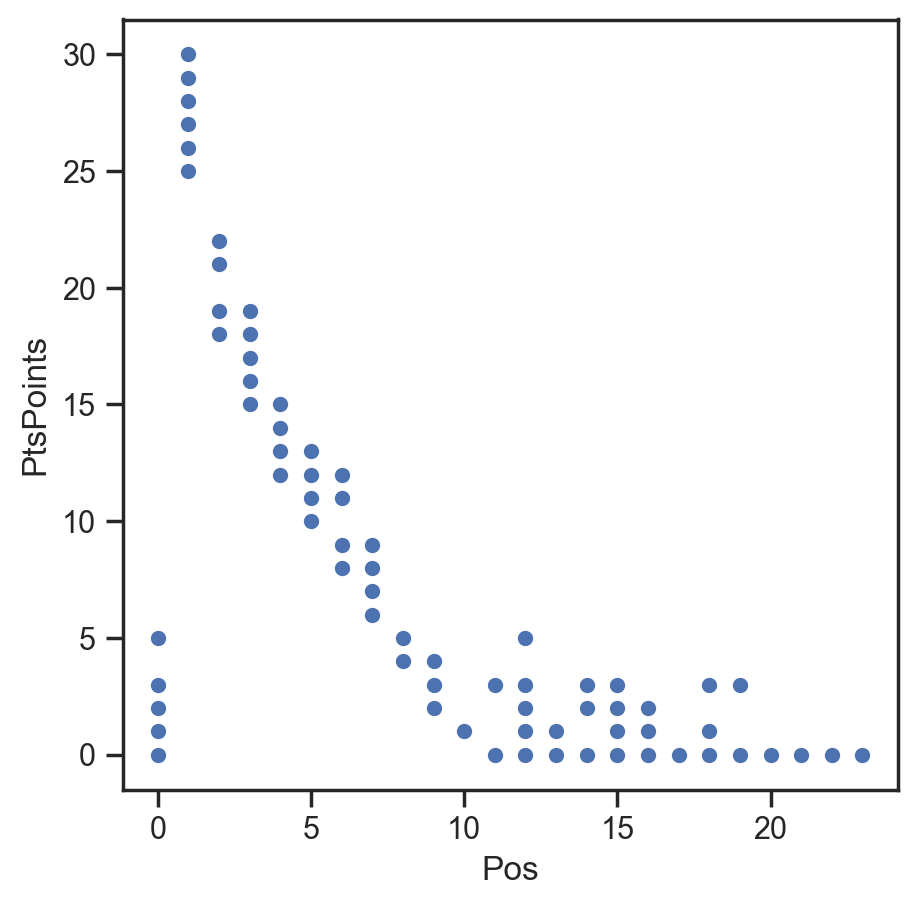

In [36]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=X['Pos'], y=Y)

In [37]:
svr_1 = SVR()
svr_1.fit(X_train, Y_train)

SVR()

In [38]:
Y_pred_1 = svr_1.predict(X_test)

Проверим результат на 2 метриках

In [39]:
mean_absolute_error(Y_test, Y_pred_1), mean_squared_error(Y_test, Y_pred_1)

(4.3820719651236155, 62.21143399612187)

### Случайный лес

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

In [41]:
tree1 = RandomForestRegressor(n_estimators=4, oob_score=True, random_state=2023)
tree1.fit(X, Y)

C:\Users\79626\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=4, oob_score=True, random_state=2023)

In [42]:
# Out-of-bag error, возвращаемый регрессором
tree1.oob_score_, 1-tree1.oob_score_

(0.7456213212836833, 0.2543786787163167)

Визуализируем обучающие деревья

In [43]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

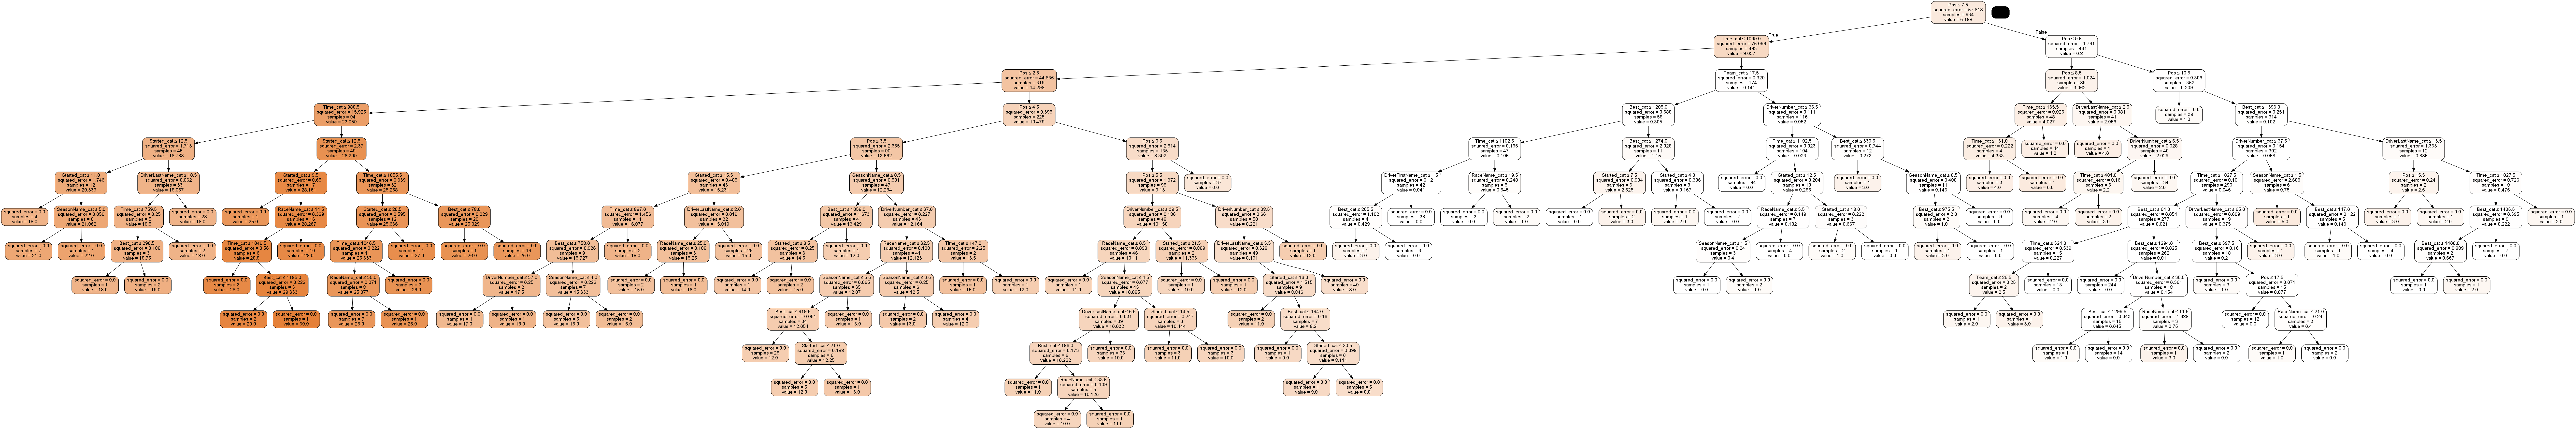

In [44]:
Image(get_png_tree(tree1.estimators_[0], X.columns), width="500")

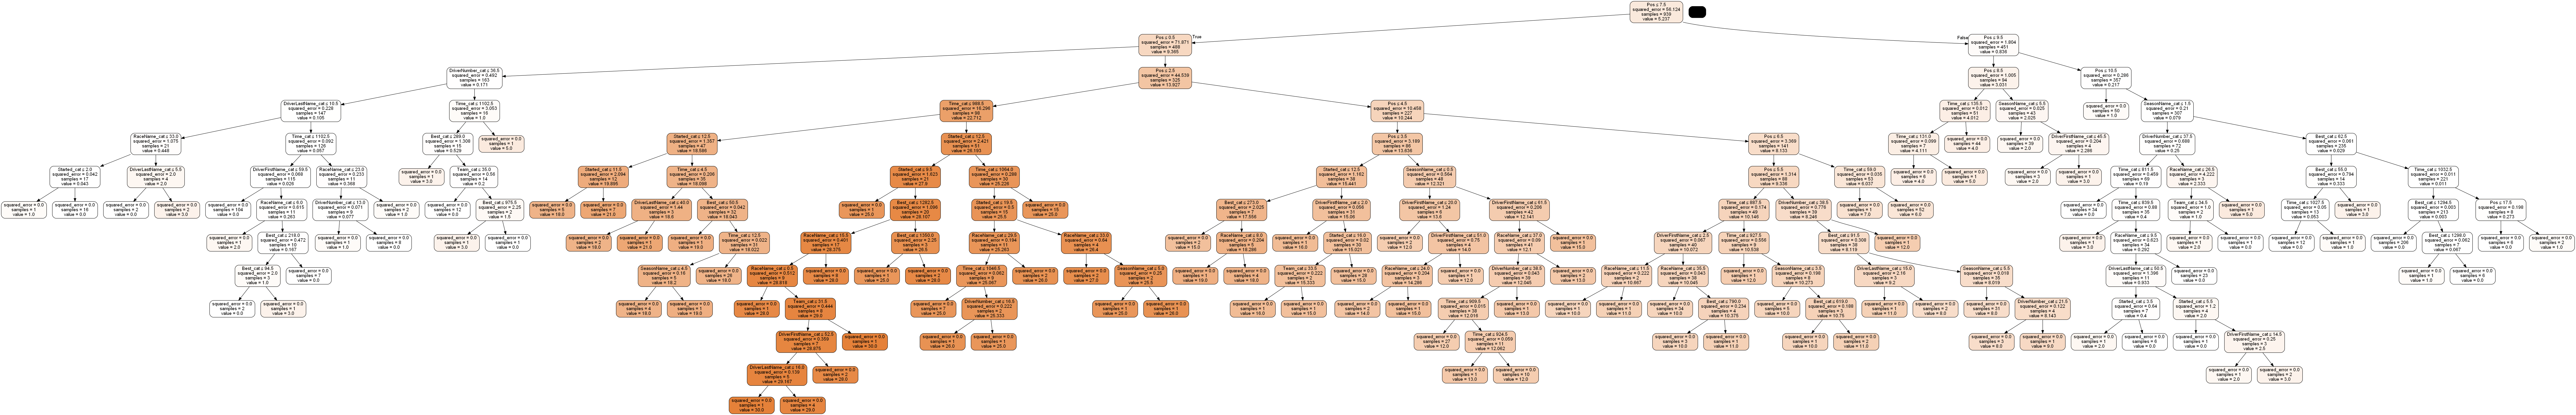

In [45]:
Image(get_png_tree(tree1.estimators_[1], X.columns), width="500")

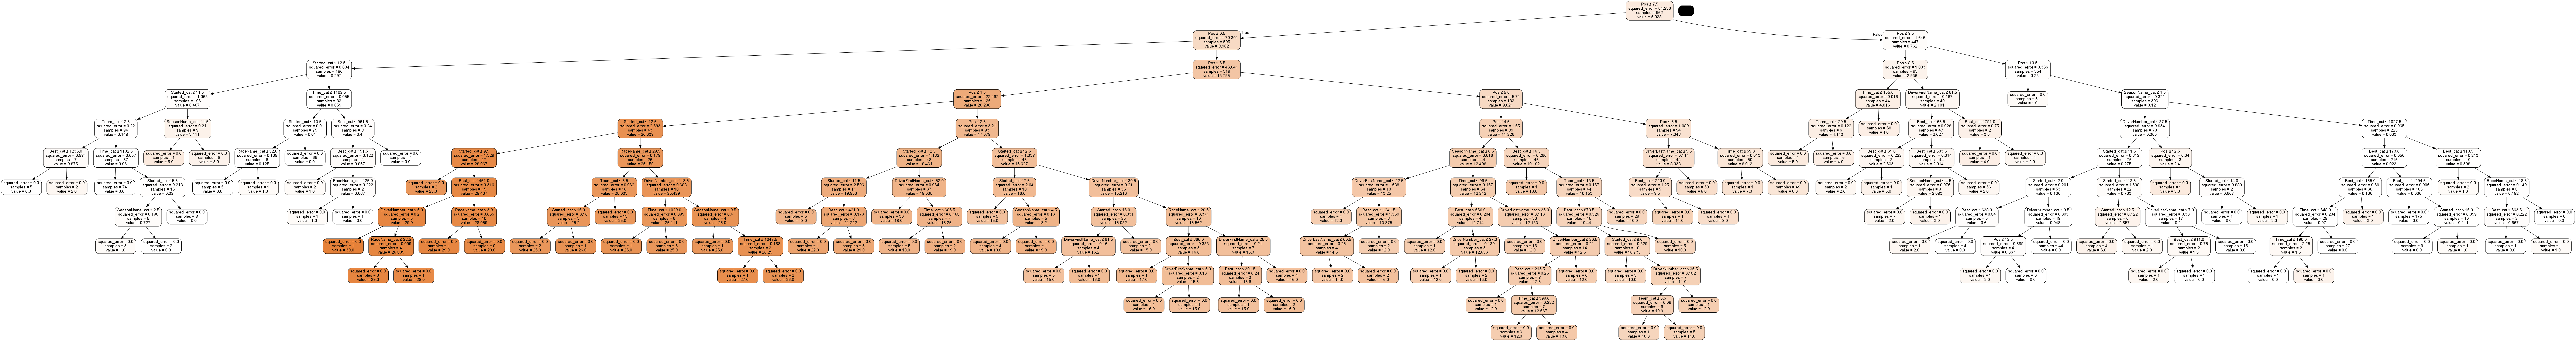

In [46]:
Image(get_png_tree(tree1.estimators_[2], X.columns), width="500")

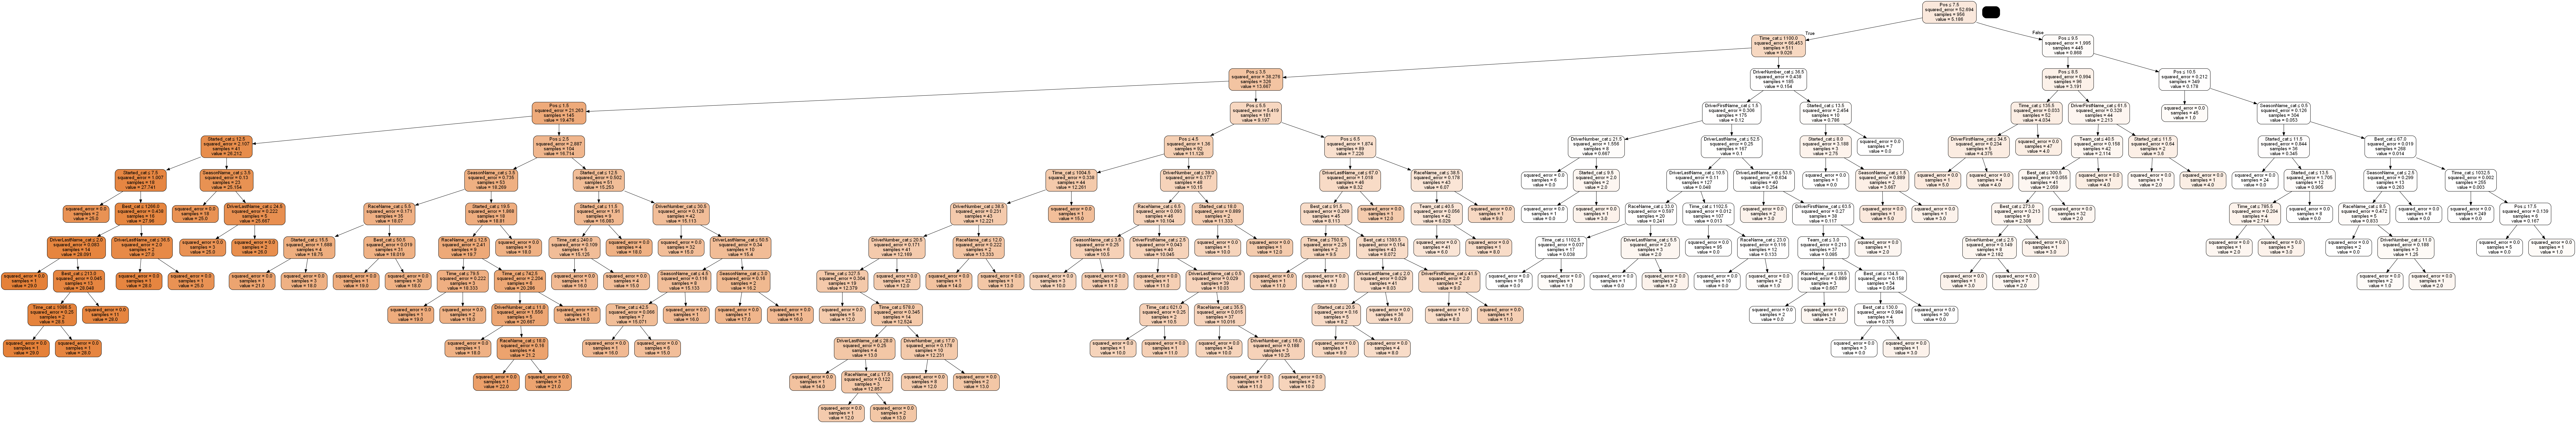

In [47]:
Image(get_png_tree(tree1.estimators_[3], X.columns), width="500")

In [48]:
regressor = RandomForestRegressor(n_estimators=4, random_state=2022)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [49]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.2913907284768212
Mean Squared Error: 0.4859271523178808
Root Mean Squared Error: 0.6970847526075153


## Вывод:

В данном контексте, эти числа являются метриками оценки качества модели регрессии на основе её прогнозов и фактических значений.

Mean Absolute Error (MAE) - это средняя абсолютная ошибка, которая измеряется в тех же единицах, что и целевая переменная. В данном случае, значение MAE составляет 0.2914, что означает, что средняя ошибка модели при прогнозировании целевой переменной равна 0.2914.

Mean Squared Error (MSE) - это средняя квадратичная ошибка, которая также измеряется в квадрате единиц целевой переменной. В данном случае, значение MSE составляет 0.4859, что означает, что средняя квадратичная ошибка модели при прогнозировании целевой переменной равна 0.4859.

Root Mean Squared Error (RMSE) - это корень из MSE, который также измеряется в тех же единицах, что и целевая переменная. В данном случае, значение RMSE составляет 0.6971, что означает, что средняя квадратичная ошибка модели при прогнозировании целевой переменной составляет 0.6971.

Из этих метрик можно сделать вывод о том, насколько хорошо модель работает при прогнозировании целевой переменной. Чем меньше значения MAE и RMSE, тем лучше качество модели.